## Pythonで実践するグラフ因果推論入門
## 第1回：因果グラフモデルの基礎
## （CausalGraphicalModelsを使ったDAG）

url : https://www.salesanalytics.co.jp/datascience/datascience230/

因果推論は、因果関係を理解し、その影響を予測するための重要な分析手法です。

特にDAG（有向非巡回グラフ）は、複雑な因果関係を視覚化し、交絡因子やバックドア基準を特定するために重要です。

今回は、PythonのCausalGraphicalModelsライブラリを使って因果グラフモデルを作成し、DAGの定義からd-分離、介入、反実仮想のシミュレーションまでの基本的な手法を解説します。

## はじめに
## 因果グラフモデルの概要

データ分析では、変数同士の相関関係を正しく理解するだけでなく、真の因果関係を見つけることが非常に重要です。

例えば、変数Aと変数Bの間に強い相関が見られた場合、それだけではAがBに影響を与えているのか、またはBがAに影響を与えているのか、あるいは第三の変数Cによる影響なのかを明確にすることはできません。このような場合、因果推論の手法が使われます。

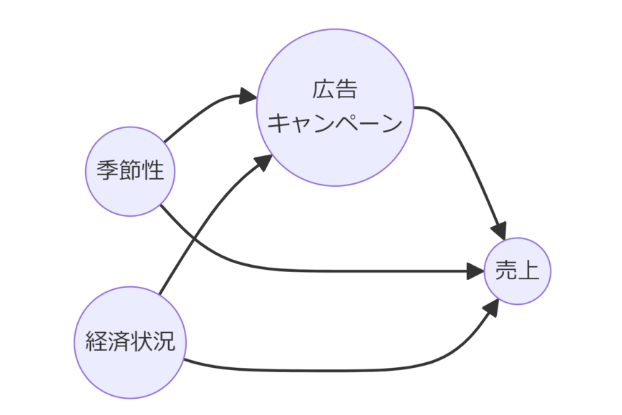

因果グラフモデルの代表的な手法であるDAG（有向非巡回グラフ）は、因果関係を図示するためのツールです。

DAGは、ノード（変数）とエッジ（因果関係）で構成され、エッジの方向によってどの変数が他の変数に影響を与えるかを表現します。

DAGの特性は、有向でありつつ循環（サイクル）を含まないことです。これにより、因果関係の方向が明確になり、どの変数に介入すると他の変数にどう影響が及ぶかを可視化できます。

DAGの特徴的な活用方法としては、以下のような点が挙げられます。

    交絡因子の特定：異なる変数の関係に影響を与える要因を見つける。
    バックドア基準：特定の条件下でノード間の交絡を排除し、因果関係を正しく推測する。
    介入効果の予測：特定のノードに介入（値を固定）した場合に、他のノードの結果にどう影響するかを推測する。

## CausalGraphicalModelsの概要

CausalGraphicalModelsは、PythonでDAGを作成・可視化するための便利なライブラリです。

url: https://github.com/ijmbarr/causalgraphicalmodels

d-分離や介入シミュレーション、反事実のシナリオ設定など、因果推論の基礎的な手法を提供し、複雑な関係を持つデータの分析に適しています。

このライブラリの主な特徴は次のとおりです。

    DAGの作成と視覚化：シンプルな構文でノードとエッジを定義し、グラフを図として描画できます。
    d-分離の確認：グラフ上で、特定の条件下での独立性を確認することができます。
    シミュレーション検討：特定の変数に介入（do-演算）し、その結果が他の変数にどう影響するかをシミュレーションや、反事仮想のシミュレーションを検討するときに利用できます。

## DAG用語

以下は、DAG（有向非巡回グラフ）で使用される専門用語の説明をまとめた表です。

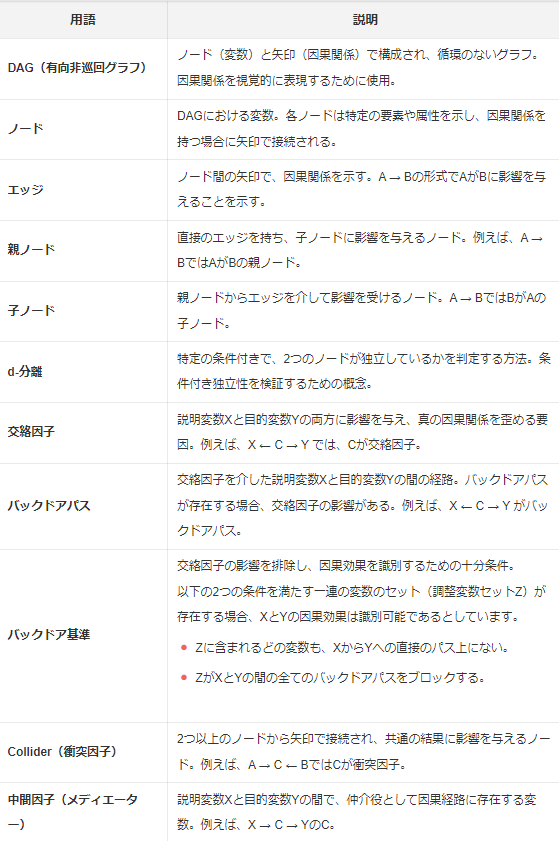

## CausalGraphicalModelsのセットアップ
## インストール

CausalGraphicalModelsライブラリは、Pythonで因果グラフモデルを定義し、視覚化や基本的なd-分離の検証を行うための便利なツールです。

以下のコマンドを使ってインストールできます。

In [1]:
# pip install causalgraphicalmodels

## 基本的な使用法の紹介

DAGを定義し、視覚化するための基本的な使い方を紹介します。

次の4つの変数の間の因果関係をDAGとして定義し、図として視覚化しています。

    運動習慣（Exercise）
    食生活（Diet）
    収入（Income）
    健康状態（Health）

以下、コードです。

In [2]:
# # 必要なPythonバージョンをインストール
# !sudo apt-get update -y
# !sudo apt-get install python3.9

# # シンボリックリンクを設定してデフォルトのPythonを変更
# !sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 1

# # Pythonバージョンを確認
# !python3 --version

In [3]:
# from causalgraphicalmodels import CausalGraphicalModel

# # DAGの定義
# dag = CausalGraphicalModel(
#     nodes=["Exercise", "Diet", "Income", "Health"],
#     edges=[
#         ("Income", "Diet"),
#         ("Income", "Exercise"),
#         ("Diet", "Health"),
#         ("Exercise", "Health")
#     ]
# )
# # DAGの可視化
# dag.draw()

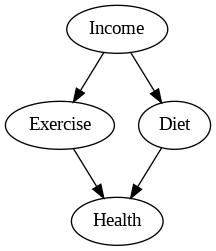

In [4]:
import pydot
from IPython.display import Image, display

# グラフの定義
graph = pydot.Dot(graph_type="digraph")

nodes = ["Exercise", "Diet", "Income", "Health"]
edges = [
    ("Income", "Diet"),
    ("Income", "Exercise"),
    ("Diet", "Health"),
    ("Exercise", "Health")
]

# ノードの追加
for node in nodes:
    graph.add_node(pydot.Node(node))

# エッジの追加
for edge in edges:
    graph.add_edge(pydot.Edge(edge[0], edge[1]))

# グラフの描画
display(Image(graph.create_png()))

    Income → Diet
収入（Income）は、食生活（Diet）に影響を与えます。収入が高いと、より健康的な食生活を選ぶ傾向があるかもしれません。

    Income → Exercise
収入（Income）は、運動習慣（Exercise）に影響を与えます。高い収入の人は、スポーツジムのメンバーシップや運動設備へのアクセスが良くなるため、運動習慣がつく可能性があります。

    Diet → Health
食生活（Diet）は、健康状態（Health）に影響を与えます。健康的な食事を取ることで、生活習慣病のリスクを減らし、体調を良くできる可能性があります。

    Exercise → Health
運動習慣（Exercise）は、健康状態（Health）に影響を与えます。運動することにより、心肺機能の向上や筋力の強化を通じて健康を維持できます。

このDAGでは、収入（Income）が食生活（Diet）と健康状態（Health）の両方に影響し、それらが最終的に健康状態（Health）に影響を及ぼすことを示しています。

これは、収入（Income）が間接的に健康状態（Health）に影響を与えていることを意味します。したがって、収入（Income）のレベルを条件として食生活（Diet）と健康状態（Health）を評価することが重要です。

このDAGから、d-分離や介入などを行うことで、各変数の因果関係をより深く分析できます。

## d-分離と条件付き独立性
## d-分離の理論的な概念と検証方法

d-分離（d-separation）は、DAG内のノード間の独立性を判定するための方法です。2つのノードAとBが、ある条件付きで独立しているかどうかを確認します。

これにより、交絡因子やバックドア基準などの条件付き独立性を確認でき、より正確な因果関係の分析が可能です。

d-分離と関連した概念には、以下のものがあります。

    バックドアパス（Backdoor Path）と交絡因子
AとBの間の経路に交絡因子が介在している場合のパス。交絡因子を条件に含めることでAとBをd-分離できる可能性があります。

    フォワードパス（Forward Path）と中間因子
AからBへの直接または間接の経路。途中に第三のノードがない場合はd-分離されません。AからBへの間接の経路には中間因子があります。

    衝突因子（Collider）
共通の結果に影響を与えるノード。A → C ← Bのような構造では、Cを条件に含めることでAとBの間に依存性が生じ、d-分離されません。

## バックドアパス（Backdoor Path）と交絡因子

バックドアパスとは、説明変数（A）と目的変数（B）の間に交絡因子が存在する経路です。

d-分離を使うことで、DAGにおけるノード間の独立性を確認し、交絡因子を特定することができます。

交絡因子が存在すると、誤った因果関係が推定される可能性があるため、正確な介入による効果の分析には交絡因子の検出が重要です。

具体的な例を示すDAGを考えます。

以下、コードです。

In [5]:
# from causalgraphicalmodels import CausalGraphicalModel

# # DAG構造の定義
# dag = CausalGraphicalModel(
#     nodes=["A", "B", "C"],
#     edges=[("C", "A"), ("C", "B")]
# )
# # DAGの可視化
# dag.draw()

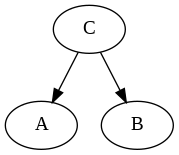

In [6]:
# DAG構造の定義
nodes = ["A", "B", "C"]
edges = [("C", "A"), ("C", "B")]

# pydotによるDAGの描画
graph = pydot.Dot(graph_type="digraph")

# ノードの追加
for node in nodes:
    graph.add_node(pydot.Node(node))

# エッジの追加
for edge in edges:
    graph.add_edge(pydot.Edge(edge[0], edge[1]))

# 描画の表示
png_str = graph.create_png()
display(Image(png_str))

交絡因子CがAとBの両方に影響を与えるバックドアパスが存在しているかどうかを確認してみます。

is_d_separatedメソッドの出力がTrueであればCは交絡因子であり、その影響を取り除くことでAとBの直接的な関係が正確に評価できます。

以下、コードです。

In [7]:
# # Cを条件にしたとき、AとBがd-分離されるか確認
# is_d_sep = dag.is_d_separated("A", "B", {"C"})
# print(f"AとBはCを条件にするとd-分離されるか: {is_d_sep}")

以下、実行結果です。

AとBはCを条件にするとd-分離されるか: True


Cを条件にすることで、AとBの間にある交絡因子Cの影響が排除され、AとBがd-分離されます。

したがって、Cは交絡因子であり、その影響を取り除くことでAとBの直接的な関係が正確に評価できます。

## どう条件づけるのが理想か？
## 交絡因子について

交絡因子は、説明変数（A）と目的変数（B）に共通の影響を与え、AとBの間に偽の因果関係を作り出す変数です。

交絡因子を条件付けすることで、バックドアパス（交絡因子を通じてAとBの間にできる経路）が遮断されます。この遮断により、AとBの因果関係が正確に推定できるようになります。

たとえば、A（運動）とB（健康）の間に交絡因子C（年齢）がある場合、年齢を条件付けることで、運動と健康の間に存在する交絡の影響を取り除くことができます。

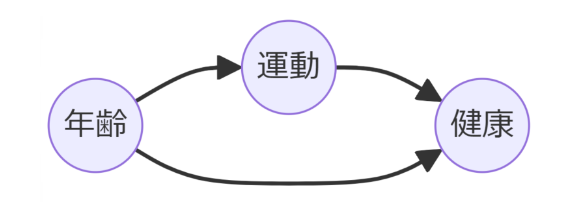

## 衝突因子について

衝突因子（Collider）は、共通の結果を持つ変数です。

衝突因子に条件付けすると、それぞれの親ノード（入力側のノード）が条件付けされた結果に影響を与えるため、もともと独立していたノード同士が相関を持つようになります。この現象は「条件付けの逆説」とも呼ばれ、分析の際に注意が必要です。

たとえば、A（遺伝的要因）とB（運動習慣）が、C（健康）に共通して影響を与える場合、Cを条件付けると、AとBの間に相関が生じます。もともと独立していたAとBが、Cという共通の結果を介して関係するためです。

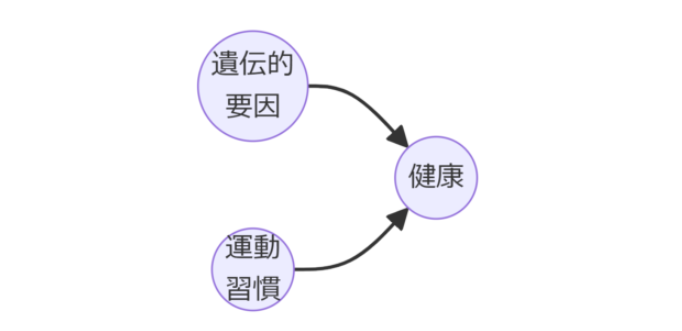

そのため、多くの場合、衝突因子への条件付けは相関を生じさせることになるため、注意が必要です。衝突因子に条件付けしないことで、もともと独立していたノード同士の相関を避けることができます。

## 中間因子について

中間因子（mediator）は、説明変数（A）と目的変数（B）の間に直接位置し、Aの影響がBに伝わる過程で仲介する変数です。

中間因子を条件付けると、説明変数（A）から目的変数（B）への直接的な影響だけを測定できるようになります。しかし、中間因子に条件付けることで、AとBの間に存在する間接的な影響（A → 中間因子 → B）を遮断します。

たとえば、A（収入）とB（健康）の間に中間因子C（食事）がある場合、食事を条件付けることで、収入から健康への直接効果のみが測定でき、間接的に食事を介して健康に与える影響は除外されます。



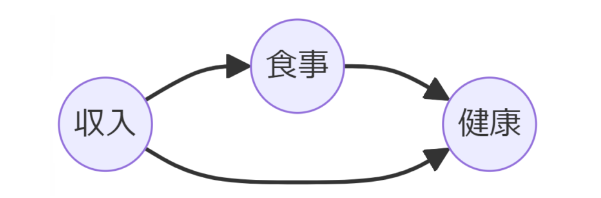

中間因子への条件付けは、直接効果と間接効果を分けて測定するのに役立ちますが、バイアスが発生する可能性もあるため注意が必要です。

## 交絡因子を調整せずに中間因子を条件付ける過ち

交絡因子が中間因子に影響を与える場合、その交絡の影響が目的変数に伝わり、結果的に誤った結論が導かれることがあります。

中間因子（mediator）への条件付けがバイアスを生じる理由を、DAGを使って説明します。

以下のDAGでは、交絡因子（年齢：age）、中間因子（食事：Diet）、説明変数（収入：Income）、目的変数（健康：Health）の関係を示します。

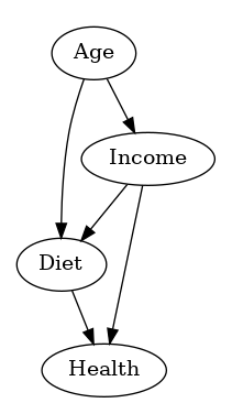

Diet（食事）を条件付けした場合のバイアス

「Diet（食事）」を条件付け（固定）することで、Income（収入）からHealth（健康）への経路が直接効果として測定されます。

しかし、交絡因子である「Age（年齢）」が他の経路を通じてHealth（健康）に影響を与えるため、選択バイアスが生じる可能性があります。

この選択バイアスは、Diet（食事）を特定の条件で固定したことによるものです。

    Diet（食事）とコライダーの影響
Diet（食事）はAge（年齢）とIncome（収入）の衝突因子（コライダー）。

そこを条件付けすることにより、Age（年齢）とIncome（収入）の間の相関に変化が生まれます。

これが「条件付けの逆説」として知られる現象です。

    バイアスの影響
Diet（食事）を条件付けすると、とIncome（収入）とHealth（健康）の間にある直接効果だけを測定するため、Age（年齢）やその他の経路を通じた影響が適切に評価できなくなり、バイアスが生じます。

結果的に、Income（収入）とHealth（健康）の間の因果関係の解釈が難しくなり、誤った結論に至る可能性があります。

    注意すべき点

中間因子への条件付けを行う際には、交絡因子の影響や衝突因子の影響を十分に考慮する必要があります。

中間因子への条件付けが目的に応じて有用であっても、選択バイアスや条件付けの逆説などが生じる場合には、慎重な分析が必要です。

## do-演算とシミュレーション
## 2つのシミュレーション

因果グラフを使いながら実施する因果推論のシミュレーションがあります。

代表的なのは以下の2つです。

    介入シミュレーション
    反実仮想シミュレーション

## 介入シミュレーションとは

特定の変数に対して意図的な変更を加え、その影響を他の変数にどう影響するかを観察することです。

例えば、「収入を高くする」という介入を行い、それが健康にどのように影響するかを見ることが該当します。

このシミュレーションを実施するために、データセットからモデルを構築する必要があります。

DAGの関係性を見ながら、1つ1つ伝統的な統計モデル（GLM：一般化線形モデル、線形回帰モデルやロジスティック回帰モデルなどを含む）で構築するパス解析モデルや、DAGの関係性をそのままモデリングする、構造方程式モデリング（SEM）というものもあります。

今回は、介入シミュレーションをGLMを使いパス解析モデルを地味に作っていきます。

## 反事仮想シミュレーションとは

「もしXが違ったら、Yはどうなっていたか？」という仮想の状況を考えることです。

例えば、「もし収入が低かったら、健康状態はどうなっていたか？」というシナリオを考えることが該当します。

ここで重要なのは、現実には観測されない条件下での結果を推測することです。

このシミュレーションをするために、介入シミュレーションのような伝統的な統計モデルだけでなく、機械学習モデルを使うことがあります。

反実仮想機械学習（Counterfactual Machine Learning）などと言われます。

## 今回利用するDAG

今回は、以下の変数を持つDAGで話しをします。

    Income（収入）：収入は、食事（Diet）と運動習慣（Exercise）の両方に直接的に影響を与えます。
    Diet（食事）：収入の影響を受け、食事の内容が決まります。収入が高いと、より良い食事を取る傾向があります。また、食事は健康（Health）に直接影響を与えます。
    Exercise（運動習慣）：運動習慣も収入の影響を受けます。収入が高いとスポーツジムへのアクセスが良くなったり、スポーツに使える余裕が生まれます。運動習慣は健康に直接影響を与えます。
    Health（健康）：健康は、食事と運動習慣の両方の影響を受ける目的変数です。

以下、コードです。

In [8]:
# from causalgraphicalmodels import CausalGraphicalModel

# # DAGの定義
# dag = CausalGraphicalModel(
#     nodes=["Diet", "Exercise", "Income", "Health"],
#     edges=[
#         ("Income", "Diet"),
#         ("Income", "Exercise"),
#         ("Diet", "Health"),
#         ("Exercise", "Health")
#     ]
# )
# # DAGの可視化
# dag.draw()

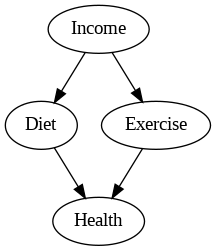

In [9]:
import pydot
from IPython.display import Image, display

# DAGの定義
nodes = ["Diet", "Exercise", "Income", "Health"]
edges = [
    ("Income", "Diet"),
    ("Income", "Exercise"),
    ("Diet", "Health"),
    ("Exercise", "Health")
]

# pydotでDAGを描画
graph = pydot.Dot(graph_type='digraph')

# ノードの追加
for node in nodes:
    graph.add_node(pydot.Node(node))

# エッジの追加
for edge in edges:
    graph.add_edge(pydot.Edge(edge[0], edge[1]))

# グラフの画像を保存
graph.write_png('dag.png')

# 画像の表示
display(Image(filename='dag.png'))

## データの準備
## 今回利用するデータセット

ここまでは、定性的なアプローチでDAGを検討してきましたが、シミュレーションとなると、そのためのモデルとそのモデルを構築するためのデータなどが必要になります。

今回利用するデータは、以下の4つの変数からなります。

    Diet（食事）：Poor, Average, Good
    Exercise（運動習慣）：None, Moderate, High
    Income（収入）：Low, Medium, High
    Health（健康）：Poor, Average, Good, Excellent

以下からダウンロードできます。

dag_data.csv

https://www.salesanalytics.co.jp/kpqk

## データセットの読み込み

では、まずデータセットを読み込みます。

以下、コードです。

In [10]:
import pandas as pd
df = pd.read_csv('dag_data.csv')
display(df)

,Diet,Exercise,Income,Health
0,1_Average,1_Moderate,1_Medium,2_Good
1,2_Good,2_High,2_High,3_Excellent
2,2_Good,2_High,2_High,3_Excellent
3,1_Average,1_Moderate,1_Medium,2_Good
4,0_Poor,0_None,0_Low,0_Poor
...,...,...,...,...
1480,2_Good,0_None,0_Low,2_Good
1481,2_Good,0_None,2_High,3_Excellent
1482,2_Good,2_High,1_Medium,3_Excellent
1483,2_Good,0_None,2_High,1_Average


## カテゴリカルデータのエンコーディング

すべてカテゴリカルデータのため、目的変数用にラベルエンコーディング、説明変数用にワンホットエンコーディングします。

以下、コードです。

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# ラベルエンコーディング
le_diet = LabelEncoder()
le_exercise = LabelEncoder()
le_income = LabelEncoder()
le_health = LabelEncoder()

# 各変数にラベルエンコーディングを適用
encoded_diet = le_diet.fit_transform(df['Diet'])
encoded_exercise = le_exercise.fit_transform(df['Exercise'])
encoded_income = le_income.fit_transform(df['Income'])
encoded_health = le_health.fit_transform(df['Health'])

# ワンホットエンコーディング
encoder = OneHotEncoder()
df_encoded = encoder.fit_transform(df[['Diet', 'Exercise', 'Income', 'Health']]).toarray()

# ラベルエンコーディングの結果をDataFrameに格納
encoded_df = pd.DataFrame({
    'Diet': encoded_diet,
    'Exercise': encoded_exercise,
    'Income': encoded_income,
    'Health': encoded_health
})

# ワンホットエンコーディングの結果をDataFrameに格納
onehot_encoded_df = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out())

# 全てを１つのデータフレームに統合
final_df = pd.concat([encoded_df, onehot_encoded_df], axis=1)
display(final_df)

,Diet,Exercise,Income,Health,Diet_0_Poor,Diet_1_Average,Diet_2_Good,Exercise_0_None,Exercise_1_Moderate,Exercise_2_High,Income_0_Low,Income_1_Medium,Income_2_High,Health_0_Poor,Health_1_Average,Health_2_Good,Health_3_Excellent
0,1,1,1,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,2,2,3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2,2,2,3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,1,1,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,2,0,0,2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1481,2,0,2,3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1482,2,2,1,3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1483,2,0,2,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


各変数が、ラベルエンコードした変数（0,1,2,…）と、ワンホットエンコードした変数（0-1）になりました。

ただ、ラベルエンコードした変数（0,1,2,…）と元の変数のカテゴリーのマッピング（対応）が分かり難いので、その対応表を表示します。

以下、コードです。

In [12]:
# Dietのマッピング
diet_mapping = dict(
    zip(le_diet.classes_,
        le_diet.transform(le_diet.classes_)
    ) )

# Exerciseのマッピング
exercise_mapping = dict(
    zip(le_exercise.classes_,
        le_exercise.transform(le_exercise.classes_)
    ) )

# Incomeのマッピング
income_mapping = dict(
    zip(le_income.classes_,
        le_income.transform(le_income.classes_)
    ) )

# Healthのマッピング
health_mapping = dict(
    zip(le_health.classes_,
        le_health.transform(le_health.classes_)
    ) )

# マッピングの表示
print("Dietマッピング:", diet_mapping)
print("Exerciseマッピング:", exercise_mapping)
print("Incomeマッピング:", income_mapping)
print("Healthマッピング:", health_mapping)

Dietマッピング: {'0_Poor': 0, '1_Average': 1, '2_Good': 2}
Exerciseマッピング: {'0_None': 0, '1_Moderate': 1, '2_High': 2}
Incomeマッピング: {'0_Low': 0, '1_Medium': 1, '2_High': 2}
Healthマッピング: {'0_Poor': 0, '1_Average': 1, '2_Good': 2, '3_Excellent': 3}


## モデル構築（GLM）

今回は、次の3つの多項ロジスティック回帰モデルを構築します。

    Dietモデル：Income（収入）から、Diet（食事）を予測する多項ロジスティック回帰モデル
    Exerciseモデル：Income（収入）から、Exercise（運動習慣）を予測する多項ロジスティック回帰モデル
    Healthモデル：Diet（食事）とExercise（運動習慣）から、健康（Health）を予測する多項ロジスティック回帰モデル

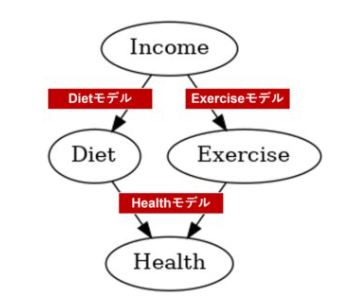

説明の中で同じ変数名で登場したとしても、説明変数として利用するときはワンホットエンコーディングしたものを、目的変数として利用するときはラベルエンコーディングしたものを使います。

例えば、Dietモデルの説明変数はIncome（収入）のワンホットエンコードした変数で、目的変数はDiet（食事）のラベルエンコードした変数です。Dietモデルの出力は、Diet（食事）の各カテゴリーの確率です。

では、この3つの多項ロジスティック回帰モデルを構築します。

以下、コードです。各モデルの正答率（accuracy）も計算しています。

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# モデルのインスタンスの作成
model_diet = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_exercise = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_health = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# モデルの学習
# Dietモデル
# 目的変数：Diet、説明変数：Incomeのワンホットコードした変数
model_diet.fit(
    final_df[['Income_0_Low', 'Income_1_Medium', 'Income_2_High']],
    final_df['Diet'])

# 正答率（accuracy）の計算
predicted_diet = model_diet.predict(
    final_df[['Income_0_Low', 'Income_1_Medium', 'Income_2_High']])
accuracy_diet = accuracy_score(final_df['Diet'], predicted_diet)
print(f'Diet model accuracy: {accuracy_diet}')

# Exerciseモデル
# 目的変数：Exercise、説明変数：Incomeのワンホットコードした変数
model_exercise.fit(
    final_df[['Income_0_Low', 'Income_1_Medium', 'Income_2_High']],
    final_df['Exercise'])

# 正答率（accuracy）の計算
predicted_exercise = model_exercise.predict(
    final_df[['Income_0_Low', 'Income_1_Medium', 'Income_2_High']])
accuracy_exercise = accuracy_score(final_df['Exercise'], predicted_exercise)
print(f'Exercise model accuracy: {accuracy_exercise}')

# Healthモデル
# 目的変数：Health、説明変数：DietとExerciseのワンホットコードした変数
model_health.fit(
    final_df[['Diet_0_Poor', 'Diet_1_Average', 'Diet_2_Good',
              'Exercise_0_None', 'Exercise_1_Moderate', 'Exercise_2_High']],
    final_df['Health'])

# 正答率（accuracy）の計算
predicted_health = model_health.predict(
    final_df[['Diet_0_Poor', 'Diet_1_Average', 'Diet_2_Good',
              'Exercise_0_None', 'Exercise_1_Moderate', 'Exercise_2_High']])

accuracy_health = accuracy_score(final_df['Health'], predicted_health)
print(f'Health model accuracy: {accuracy_health}')

Diet model accuracy: 0.7845117845117845
Exercise model accuracy: 0.7831649831649832
Health model accuracy: 0.7575757575757576


## 介入シミュレーション（do-演算）

介入（Intervention）は、因果関係の分析において特定の変数に強制的に介入し、その結果を観察する手法です。

介入を行うためには「do-演算」と呼ばれる概念を用います。

do-演算は、特定の変数をある値に固定する操作であり、他の変数への影響を観察するためのものです。

介入（do-演算）を考慮したDAG
例えば、「Income（収入）を高くする」という介入がHealth（健康状態）にどう影響を与えるかを調べようと思います。

ここで、do-演算による介入を行った後のDAGを新しく作り、どのようにグラフが変わるかを可視化します。

以下、コードです。

In [14]:
# # 介入（do-演算）によるDAGの作成（Incomeに介入）
# do_dag = dag.do("Income")
# do_dag.draw()

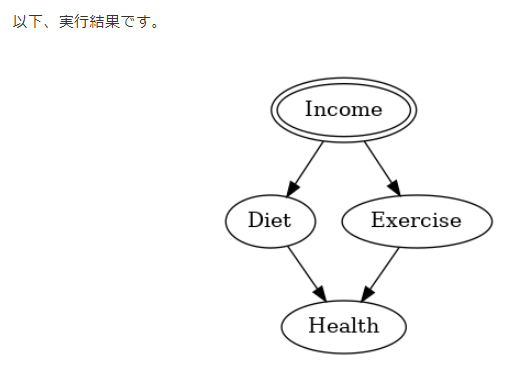

介入するIncome（収入）が強調されている様子が分かるかと思います。ただ、DAGそのものの構造自体は変化ありません。

介入する変数によっては、DAGの構造そのものが変化します。

例えば、Diet（食事）に介入した場合のDAGを描いてみます。

以下、コードです。

In [15]:
# # 介入（do-演算）によるDAGの作成（Incomeに介入）
# do_dag = dag.do("Diet")
# do_dag.draw()

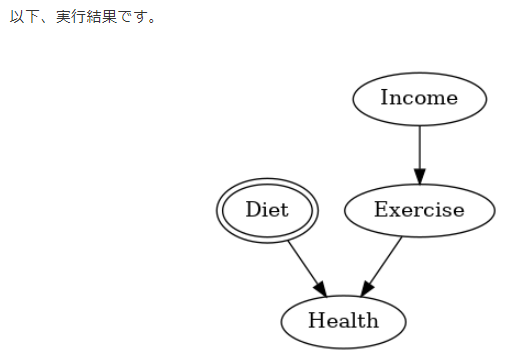

Diet（食事）に介入するため、Diet（食事）は収入（Income）の影響を受けなくなる様子が分かります。

## 介入シミュレーションの実施

今回は、Income（収入）に介入するケースで話しを進めます。

Income（収入）を高く設定し、その条件下でDiet（食事）やExercise（運動習慣）、Health（健康状態）がどう変わるかを観察します。

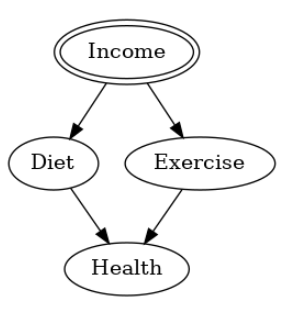

まずは、Income（収入）を高く設定した場合の、でDiet（食事）とExercise（運動習慣）を予測します。各変数の各カテゴリーの確率を出力します。

以下、コードです。

In [16]:
import pandas as pd

# IncomeがHighの場合の入力データ
input_data_income_high = pd.DataFrame(
    {
       'Income_0_Low': [0],
       'Income_1_Medium': [0],
       'Income_2_High': [1]
    }
)

# DietとExerciseの予測確率を計算
predicted_diet_probs = model_diet.predict_proba(input_data_income_high)
predicted_exercise_probs = model_exercise.predict_proba(input_data_income_high)

# 結果をデータフレームにまとめる
predicted_probs_df = pd.DataFrame(
    {
        'Diet_0_Poor': predicted_diet_probs[0][0],
        'Diet_1_Average': predicted_diet_probs[0][1],
        'Diet_2_Good': predicted_diet_probs[0][2],
        'Exercise_0_None': predicted_exercise_probs[0][0],
        'Exercise_1_Moderate': predicted_exercise_probs[0][1],
        'Exercise_2_High': predicted_exercise_probs[0][2]
    }, index=[0]
)

# 結果のデータフレームを表示
print(predicted_probs_df.T)

                            0
Diet_0_Poor          0.101884
Diet_1_Average       0.110109
Diet_2_Good          0.788007
Exercise_0_None      0.110069
Exercise_1_Moderate  0.116355
Exercise_2_High      0.773576


この結果を各変数の各カテゴリーの確率を使い、Health（健康状態）を予測します。各カテゴリーの確率を出力します。

以下、コードです。



In [17]:
# IncomeがHighの場合のDietとExerciseの予測確率を使用して、健康状態の予測
predicted_health_probs = model_health.predict_proba(predicted_probs_df)

# 結果をデータフレームに格納
predicted_health_probs_df = pd.DataFrame(
    predicted_health_probs,
    columns=[
        'Health_0_Poor',
        'Health_1_Average',
        'Health_2_Good',
        'Health_3_Excellent'
    ]
)

# 結果のデータフレームを表示
print(predicted_health_probs_df.T)

                           0
Health_0_Poor       0.104714
Health_1_Average    0.102929
Health_2_Good       0.078225
Health_3_Excellent  0.714132


元データと介入シナリオの健康分布を比較します。単に集計して構成比を比較するだけです。

以下、コードです。

In [18]:
# 元データの健康状態の分布を計算
df_health_distribution_original = df['Health'].value_counts(normalize=True)
df_health_distribution_original.columns = ['Original']

# Healthの分布のインデックスを統一するために列名を修正して再度結果をまとめる
health_distributions_intervened = predicted_health_probs_df.rename(
    columns={
        'Health_0_Poor': '0_Poor',
        'Health_1_Average': '1_Average',
        'Health_2_Good': '2_Good',
        'Health_3_Excellent': '3_Excellent'
    }).T

# 元データのHealthの分布と介入後の分布を結合
health_distribution_comparison = pd.concat(
    [df_health_distribution_original, health_distributions_intervened],
    axis=1)

health_distribution_comparison.columns = ['Original', 'Intervened']
print(health_distribution_comparison.sort_index())

             Original  Intervened
0_Poor       0.317172    0.104714
1_Average    0.078114    0.102929
2_Good       0.298316    0.078225
3_Excellent  0.306397    0.714132


## 介入の結果の解釈例


介入シミュレーションの結果に、とある解釈例です。

所得レベルが「高」にした影響

    所得レベルを「高」に固定する介入は、食生活と運動の質に顕著な影響を与えました。
    具体的には、良好な食生活（Diet_2_Good）の確率が約78.8%、高い運動レベル（Exercise_2_High）の確率が約77.4%に上昇しました。

    これは、所得が高いと健康的な食生活と運動習慣が向上することを示唆しています。

健康状態への影響

    所得レベルの介入による食生活と運動の質の向上は、健康状態にも肯定的な影響を及ぼしました。
    特に、健康状態が「優れている」（Health_3_Excellent）の確率が71.4%に達し、元のデータセットでの割合（約30.6%）から大幅に増加しました。
    一方で、「貧しい」健康状態（Health_0_Poor）の確率は、元のデータセットでの約31.7%から介入シナリオでは約10.5%に減少しました。

所得の健康への影響

    このシミュレーションは、所得が健康に直接的な影響を与えることを示しています。
    具体的には、所得が高いことが良好な食生活と運動習慣を促進し、これが健康状態の向上に寄与していることが確認できます。

公衆衛生政策への示唆

    このシミュレーション結果は、所得増加が公衆衛生改善に有効な手段であることを示唆しています。
    所得レベルを上げる政策や、低所得層に対する健康的な食生活と運動の機会を提供する政策は、全体的な健康状態の向上に寄与する可能性があります。
    この介入シミュレーションによって、所得レベルが人々の生活習慣と健康状態に与える影響を定量的に理解することができました。

このような分析は、健康格差を縮小し、より健康的な社会を実現するための政策立案に役立つ洞察を提供します。

## まとめ

今回は、PythonのライブラリCausalGraphicalModelsを使い、因果グラフであるDAG（有向非巡回グラフ）を作りながら、因果関係を視覚的に理解する手段のお話しをしました。

そこでは、d-分離や条件付き独立性の概念、バックドア基準の確認や交絡因子の検出の方法などを、何となく理解できたのではないかと思います。

また、サンプルデータを使って、介入シミュレーションを実践的に行う方法も説明しました。

次のステップとしては、定量的に因果グラフをモデリングする、ということが考えられます。

具体的には、Pythonのライブラリsemopyを使い、DAGを定量的にもモデリングする構造方程式モデリング（SEM）する方法を習得する、ということです。

このモデルを使い、様々な仮定のシナリオを検証することで、因果関係のモデル化とシミュレーションの精度を向上させることができるでしょう。

因果グラフモデルの理解を深め、これを使った分析の実践に進むことで、データに基づいた意思決定や戦略を立てられるようになります。さらなる知識を積み重ねて、因果推論のスキルを高めていきましょう。